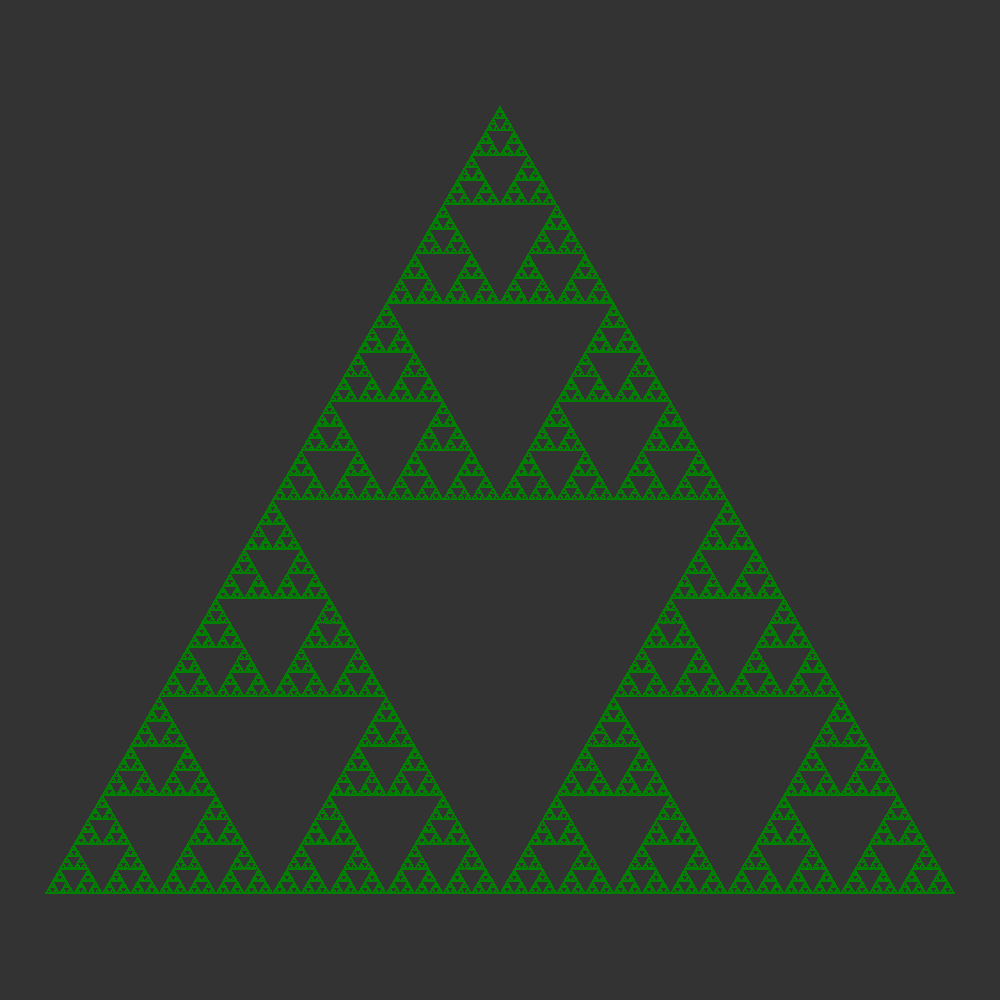

In [19]:
from generativepy.bitmap import make_bitmap, Scaler
from generativepy.color import Color
from PIL import ImageDraw
import math
import random

SIN60 = math.sin(math.pi/3)
COS60 = math.cos(math.pi/3)
SIZE = 1000
RANGE = 1.1
ITERATIONS = 1000000
VERTICES = [(-1, SIN60),
            (0, -SIN60),
            (1, SIN60)]


def paint(image, pixel_width, pixel_height, frame_no, frame_count):
    scaler = Scaler(pixel_width, pixel_height,
                    width=RANGE*2, height=RANGE*2,
                    startx=-RANGE, starty=-RANGE)
    draw = ImageDraw.Draw(image)
    draw.rectangle((0, 0, pixel_width, pixel_height),fill=Color(0.2).as_rgbstr())
    x, y = 0, 0
    color = Color('green').as_rgbstr()
    for i in range(ITERATIONS):
        vertex = random.choice(VERTICES)
        x = (x + vertex[0])/2
        y = (y + vertex[1])/2
        u, v = scaler.user_to_device(x, y)
        draw.point((u, v), color)


make_bitmap("chaos-game-sierpinski.png", paint, SIZE, SIZE)
from IPython.display import Image
Image(filename='chaos-game-sierpinski.png') 
